# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

# Start here:

1. Find and input air quality(2016) dataset from github:
https://github.com/MainakRepositor/Datasets/blob/master/Air%20Quality/real_2016_air.csv

2. load packages and check the data structure

In [1]:
library('tidyverse')
library('dplyr')
library('ggplot2')
library('forcats')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df_air=read_csv('real_2016_air.csv')
df_air|>as_tibble()|>print()

Rows: 181 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): T, TM, Tm, SLP, H, VV, V, VM, PM 2.5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 181 × 9
       T    TM    Tm   SLP     H    VV     V    VM `PM 2.5`
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>
 1  16.9  25.1   6.6 1021.    65   1.1   2     7.6     285.
 2  15.5  24.1   7.7 1021     71   1.1   3.5  11.1     220.
 3  14.9  22.8   8   1018.    73   1.1   5.9  13       182.
 4  18.3  24.7  11.5 1018.    85   0.5   1.1   7.6     154.
 5  16.5  24.7  12   1017.    82   0.6   8    13       223.
 6  16.6  22.2  10.2 1015.    65   1.8  10    20.6     201.
 7  18.2  25.1  12   1014.    77   0.6   5    11.1     285.
 8  15.6  23.2  10.9 1016.    82   0.6   4.3   9.4     237.
 9  13    19     9.6 1017.    85   0.8  10.7  16.5     277.
10  12.3  19     8.9 1016.    91   0.5   4.6   9.4     108 
# ℹ 171 more rows


3. add lables for variables

In [3]:
#add lables for the variables 
df_detailed=df_air|>
  mutate(
    T = T |> structure(comment = "Temperature (°C)"),
    TM = TM |> structure(comment = "Maximum Temperature (°C)"),
    Tm = Tm |> structure(comment = "Minimum Temperature (°C)"),
    SLP = SLP |> structure(comment = "Sea Level Pressure (hPa)"),
    H = H |> structure(comment = "Humidity (%)"),
    VV = VV |> structure(comment = "Visibility (km)"), 
    V = V |> structure(comment = "Wind Speed (m/s)"),
    VM = VM |> structure(comment = "Maximum Wind Speed (m/s)"),
    `PM 2.5` = `PM 2.5` |> structure(comment = "Particulate Matter 2.5 (µg/m³)")
  )

In [4]:
#check the name of variables
comment(df_detailed$T)
comment(df_detailed$`PM 2.5`)

[1] "Temperature (°C)"

[1] "Particulate Matter 2.5 (µg/m³)"

In [5]:
df_detailed|>head()

T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.9,25.1,6.6,1021.3,65,1.1,2.0,7.6,284.7958
15.5,24.1,7.7,1021.0,71,1.1,3.5,11.1,219.7208
14.9,22.8,8.0,1018.4,73,1.1,5.9,13.0,182.1875
18.3,24.7,11.5,1018.1,85,0.5,1.1,7.6,154.0375
16.5,24.7,12.0,1017.4,82,0.6,8.0,13.0,223.2083
16.6,22.2,10.2,1015.4,65,1.8,10.0,20.6,200.6458


4. Categorize data and count each group

In [37]:
df_categorize= df_detailed |>
  mutate(
    T_cate = case_when(
      T < 15 ~ "Cold", #assume less than 15 is cold
      T >= 15 & T < 30 ~ "Mild",
      T >= 30 ~ "Hot") #assume higher than 30 is hot
  )

df_categorize$T_cate = factor(df_categorize$T_cate, levels = c("Cold", "Mild", "Hot"))

# View updated data
head(df_categorize)

T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,T_cate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
16.9,25.1,6.6,1021.3,65,1.1,2.0,7.6,284.7958,Mild
15.5,24.1,7.7,1021.0,71,1.1,3.5,11.1,219.7208,Mild
14.9,22.8,8.0,1018.4,73,1.1,5.9,13.0,182.1875,Cold
18.3,24.7,11.5,1018.1,85,0.5,1.1,7.6,154.0375,Mild
16.5,24.7,12.0,1017.4,82,0.6,8.0,13.0,223.2083,Mild
16.6,22.2,10.2,1015.4,65,1.8,10.0,20.6,200.6458,Mild


In [38]:
# Count the number of occurrences in each temperature category
df_categorize= df_categorize |>
  count(T_cate)

# View the counts for each category
print(df_categorize)

# A tibble: 3 × 2
  T_cate     n
  <fct>  <int>
1 Cold       9
2 Mild      90
3 Hot       82


5. Making graphs

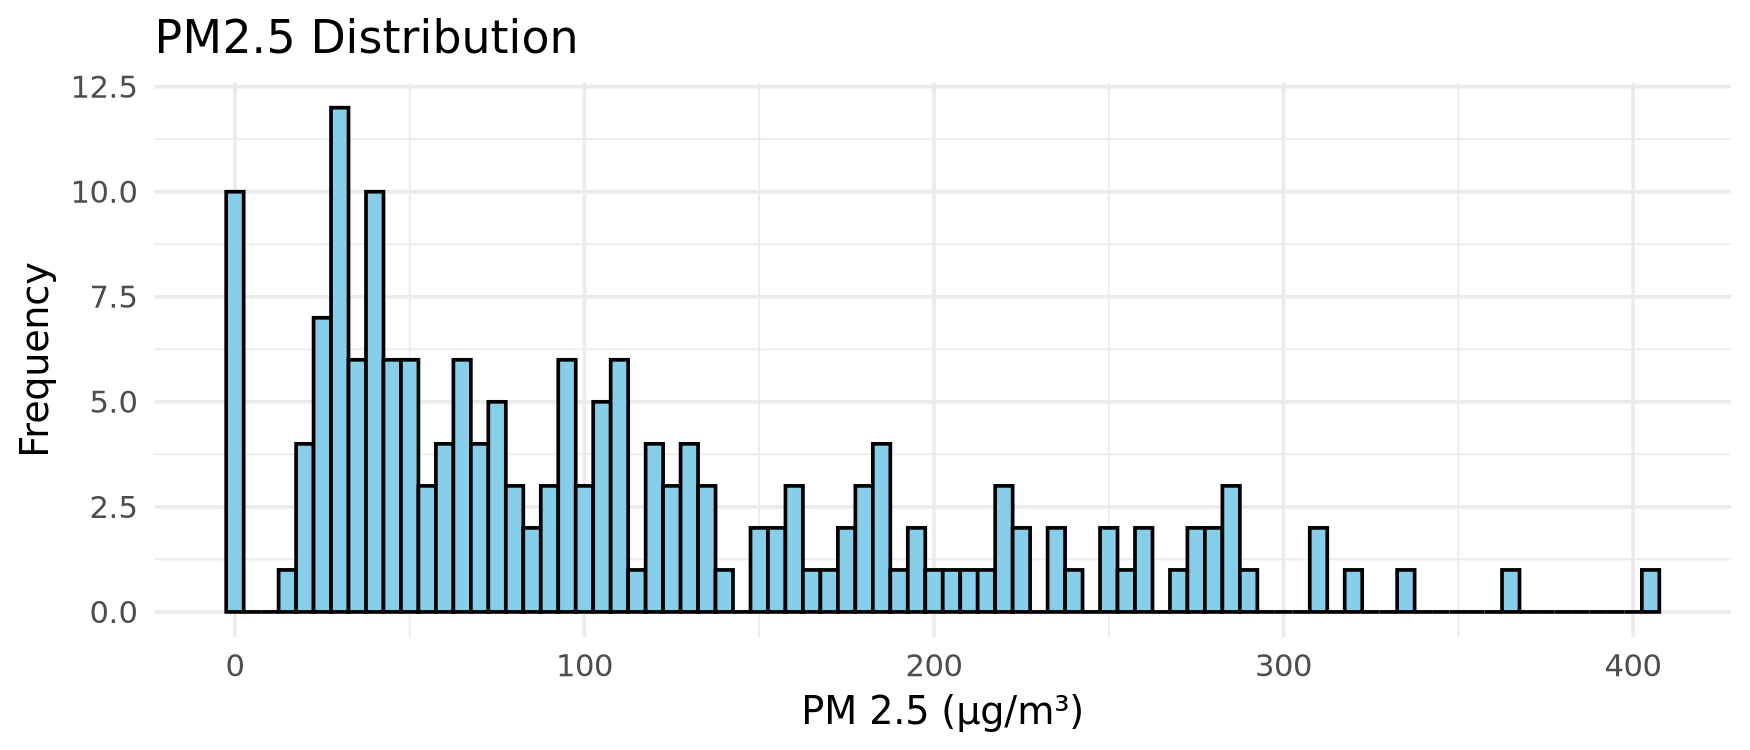

In [41]:
# distribution of PM 2.5-use histogram
ggplot(df_detailed, aes(x = `PM 2.5`)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "PM2.5 Distribution", x = "PM 2.5 (µg/m³)", y = "Frequency") +
  theme_minimal()

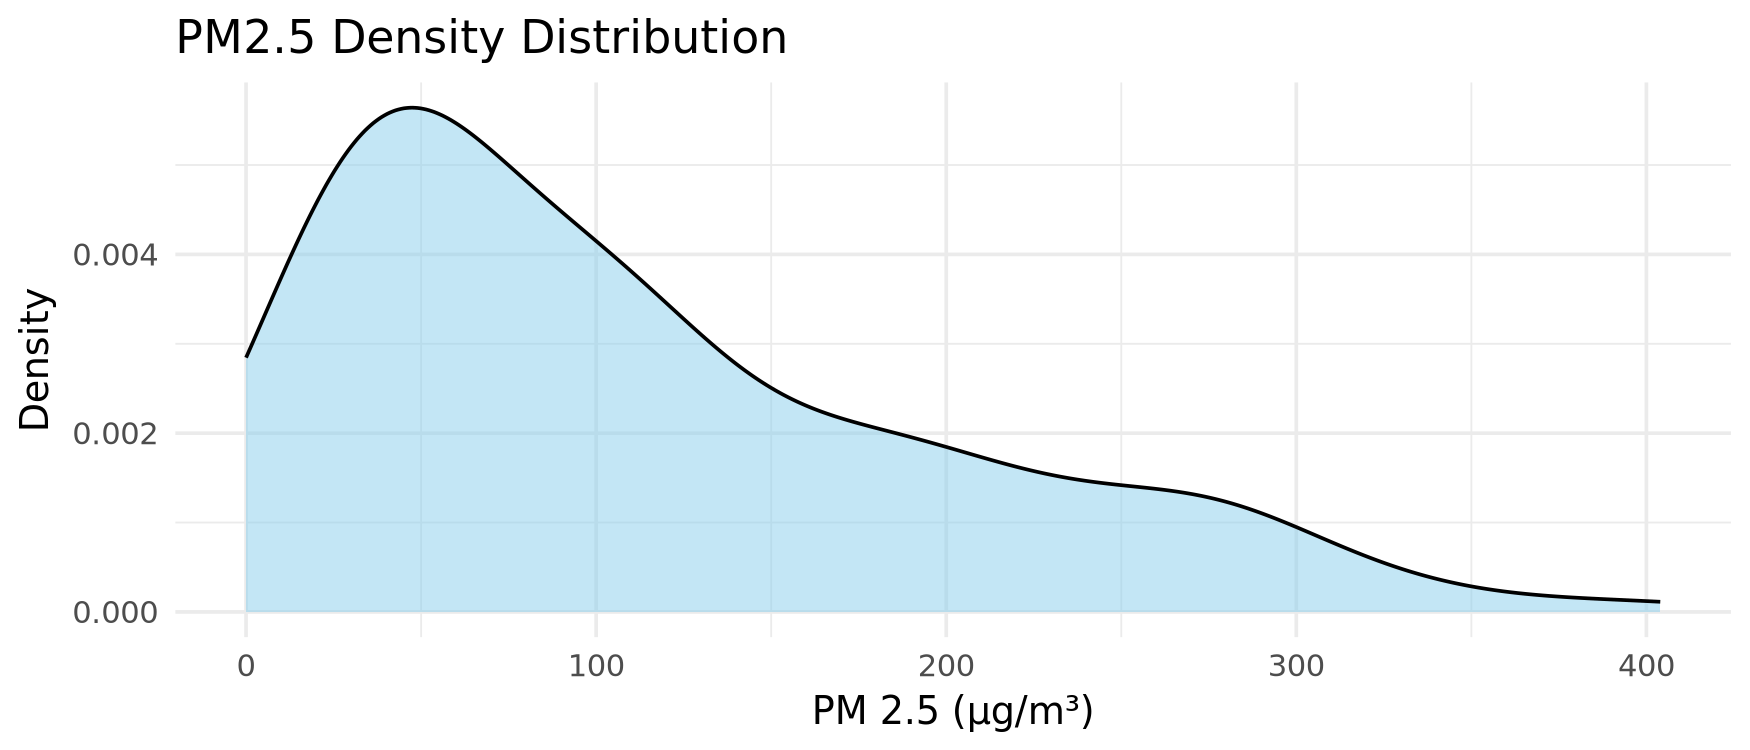

In [42]:
#desity
ggplot(df_detailed, aes(x = `PM 2.5`)) +
  geom_density(fill = "skyblue", color = "black", alpha = 0.5) +
  labs(title = "PM2.5 Density Distribution", x = "PM 2.5 (µg/m³)", y = "Density") +
  theme_minimal()

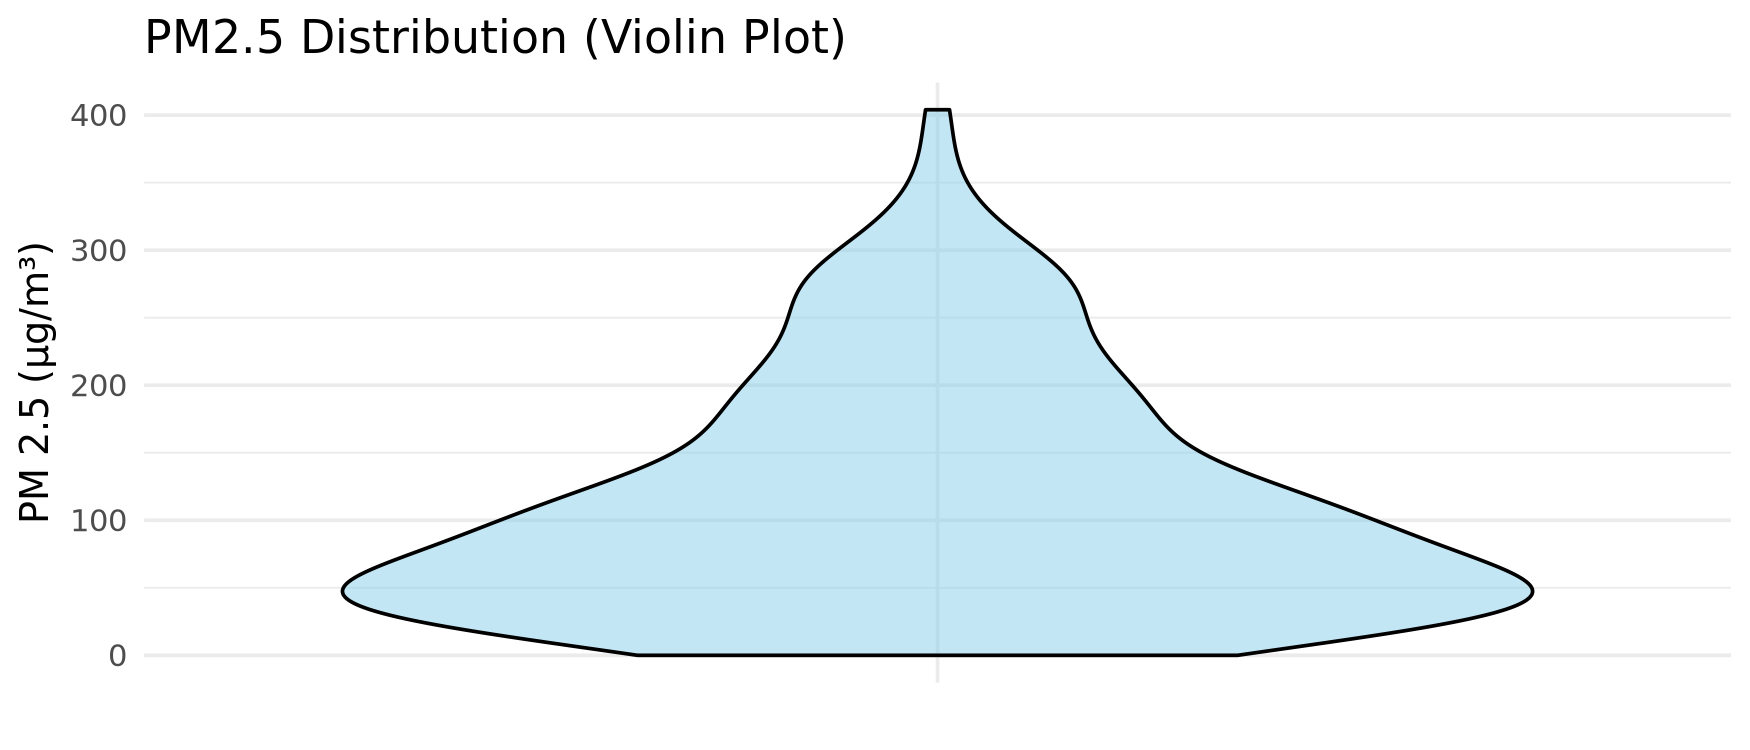

In [53]:
#violin
ggplot(df_detailed, aes(x = "", y = `PM 2.5`)) + 
  geom_violin(fill = "skyblue", color = "black", alpha = 0.5) +
  labs(title = "PM2.5 Distribution (Violin Plot)", y = "PM 2.5 (µg/m³)") +
  theme_minimal() +
  theme(axis.title.x = element_blank())

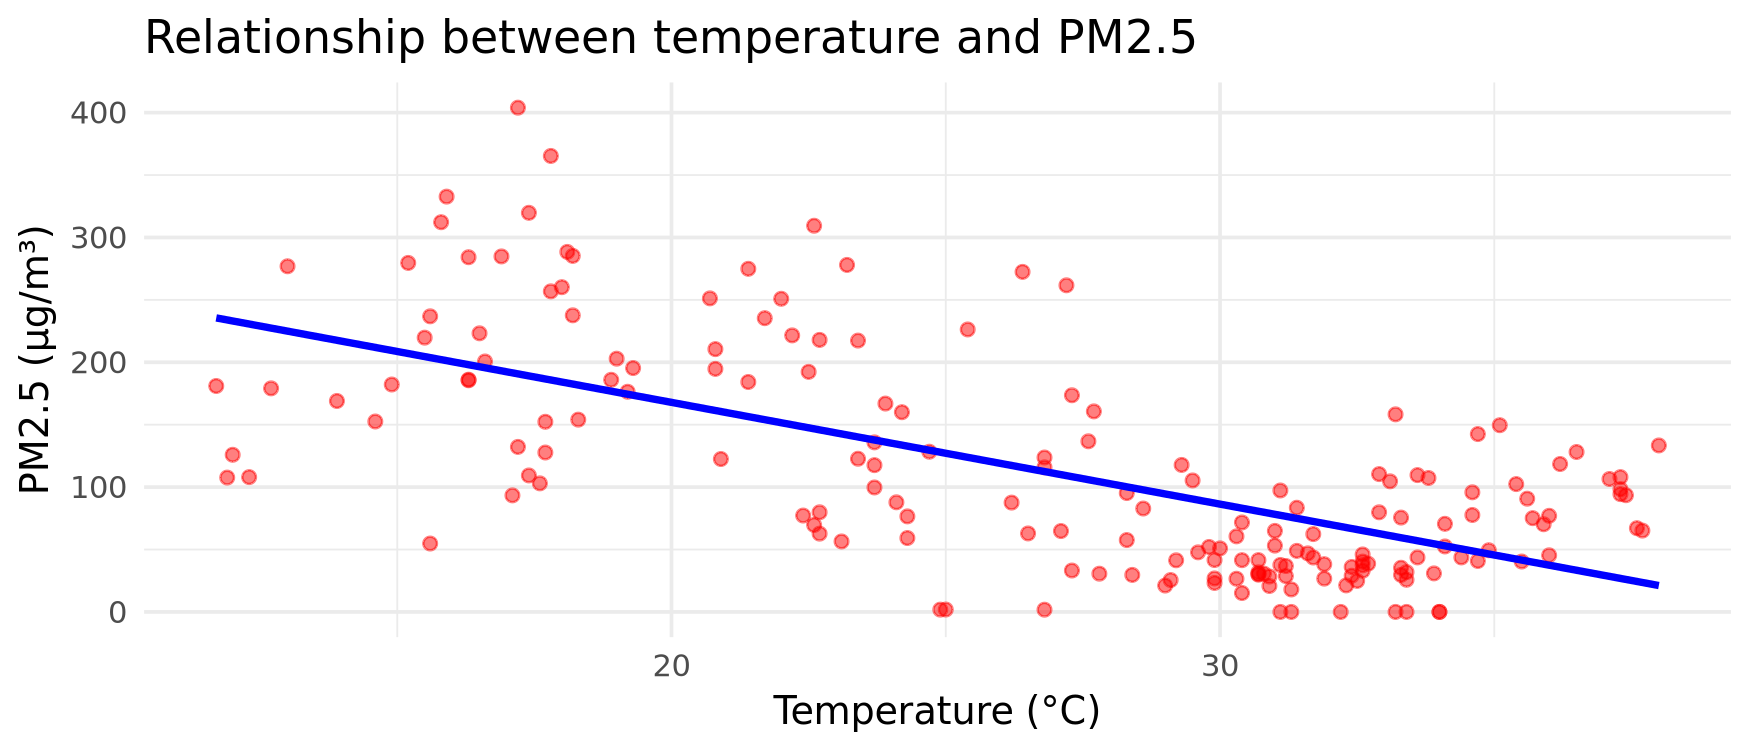

In [55]:
# relationship between temperature and PM2.5- use scatterplot
ggplot(df_detailed, aes(x = T, y =`PM 2.5`)) +
  geom_point(color = "red", alpha = 0.5) +
  geom_smooth(method = "lm", formula = 'y ~ x', color = "blue", se = FALSE) +
  labs(title = "Relationship between temperature and PM2.5", x = "Temperature (°C)", y = "PM2.5 (µg/m³)") +
  theme_minimal()

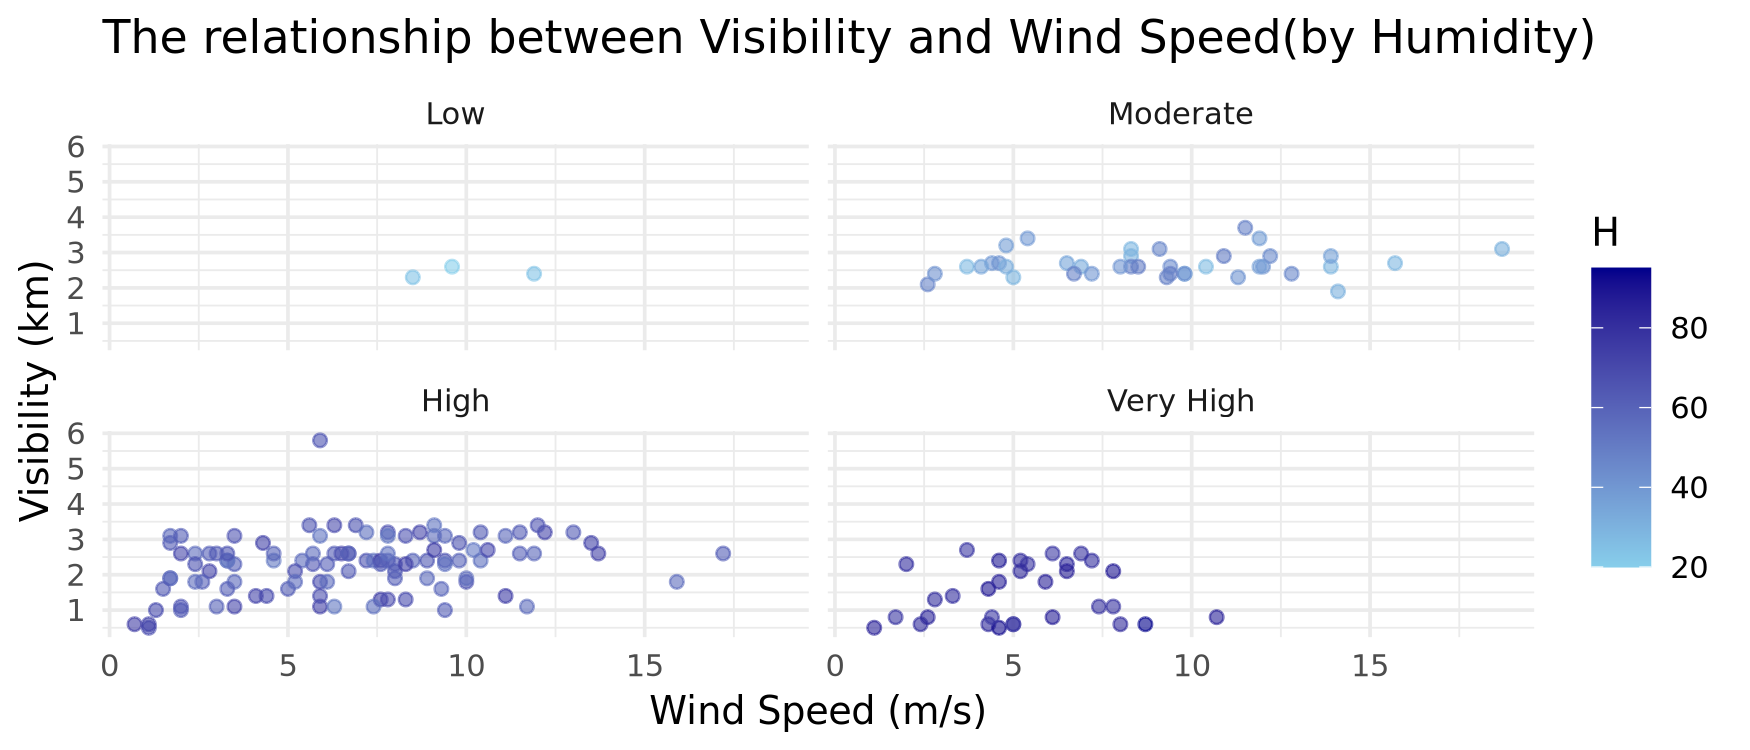

In [56]:
# The relationship between Visibility and Wind Speed(by Humidity)
ggplot(df_detailed, aes(x = V, y = VV, color = H)) +
  geom_point(alpha = 0.6) +
  facet_wrap(~ cut(H, breaks = c(0, 25, 50, 75, 100), labels = c("Low", "Moderate", "High", "Very High"))) +
  scale_color_gradient(low = "skyblue", high = "darkblue") +
  labs(title = "The relationship between Visibility and Wind Speed(by Humidity)", x = "Wind Speed (m/s)", y = "Visibility (km)") +
  theme_minimal()

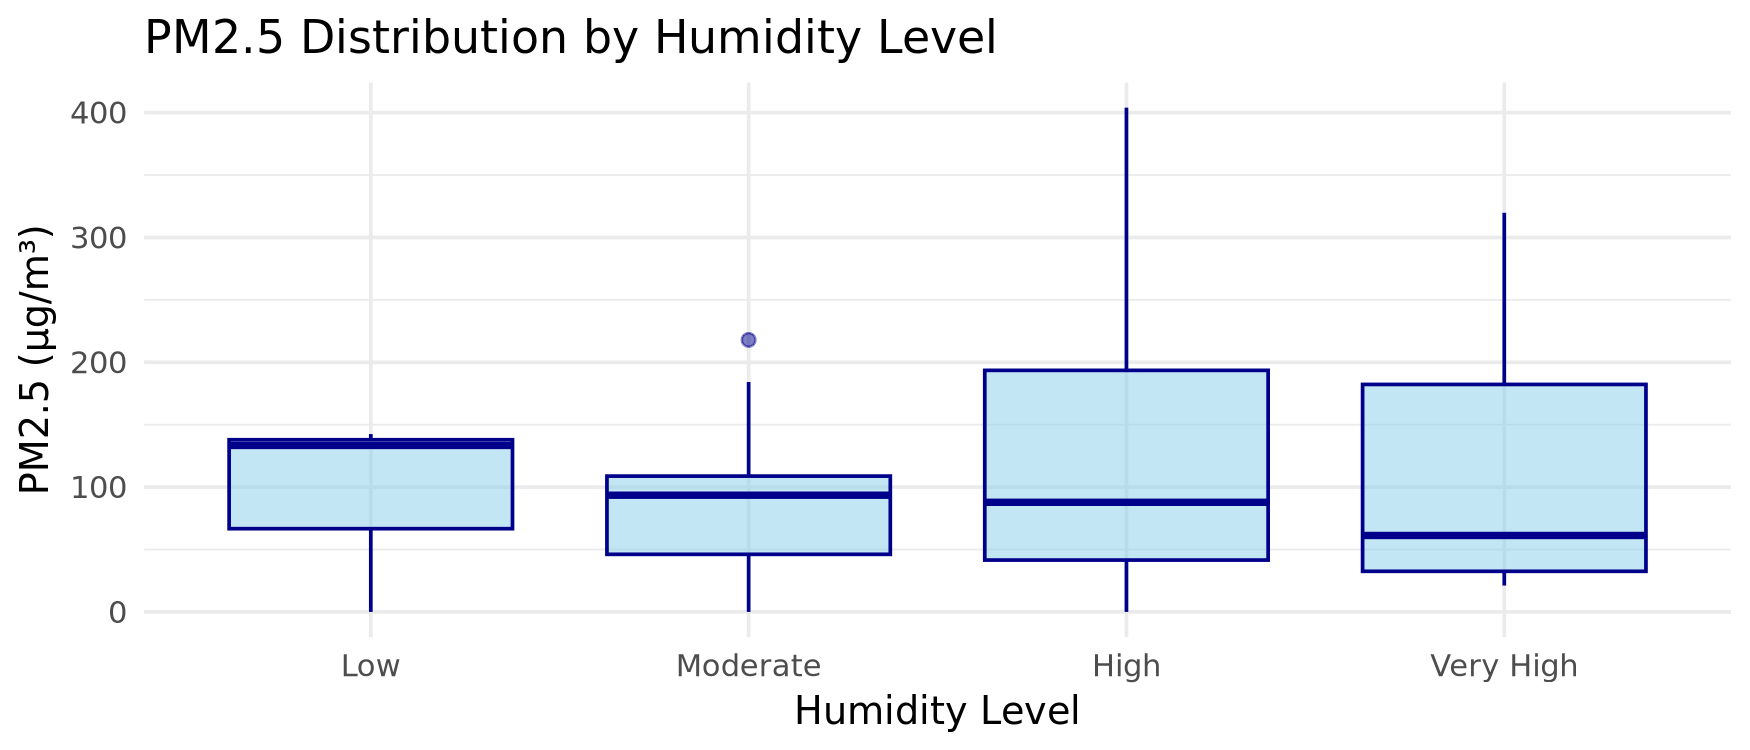

In [67]:
# PM2.5 Distribution by Humidity Level
ggplot(df_detailed, aes(x = factor(cut(H, breaks = c(0, 25, 50, 75, 100), labels = c("Low", "Moderate", "High", "Very High"))), y = `PM 2.5`)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.5) +
  labs(title = "PM2.5 Distribution by Humidity Level", x = "Humidity Level", y = "PM2.5 (µg/m³)") +
  theme_minimal()